    I have chosen to extract all tables of the given sqlite file into a csv file. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('ggplot')

## We shall start with the basic statistical questions. 
    1. Who are the major holder in market? 

In [4]:
current_owners_df = pd.read_csv('current_owners.csv')
current_owners_df.head()

,nft_address,token_id,owner
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0,0xb776cAb26B9e6Be821842DC0cc0e8217489a4581
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,1,0x8A73024B39A4477a5Dc43fD6360e446851AD1D28
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,10,0x5e5C817E9264B46cBBB980198684Ad9d14f3e0B4
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,11,0x8376f63c13b99D3eedfA51ddd77Ff375279B3Ba0
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,12,0xb5e34552F32BA9226C987769BF6555a538510BA8


In [5]:
current_owners_df.describe()

,nft_address,token_id,owner
count,7020950,7020950,7020950
unique,9292,1179659,625354
top,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,1,0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C
freq,206037,5341,100045


In [6]:
type(current_owners_df)

pandas.core.frame.DataFrame

In [7]:
big_fishes_df = current_owners_df.groupby(
    ['owner'], as_index=False).size().rename(columns = {'size':'num_tokens'})

In [8]:
# big_fishes_df.sort_values('num_tokens', inplace=True, ascending=False)

## <font color  = 'red'> Top 25 NFT Holders 

In [9]:
big_fishes_df.head(25)

,owner,num_tokens
0,0x0000000000000000000000000000000000000000,83548
1,0x0000000000000000000000000000000000000001,5531
2,0x0000000000000000000000000000000000000069,1
3,0x00000000000000000000000000000000000000ec,1
4,0x00000000000000000000000000000000000000ff,1
5,0x000000000000000000000000000000000000D3ad,1
6,0x000000000000000000000000000000000000DdDD,1
7,0x000000000000000000000000000000000000dEaD,19758
8,0x0000000000000000000000000000000000080085,2769
9,0x000000000000000000000000000000000e297BdB,1


In [10]:
big_fishes_df.describe()

,num_tokens
count,625354.000000
mean,11.227161
std,213.626083
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,100045.000000


## show. how many population have lesser tokens  ---

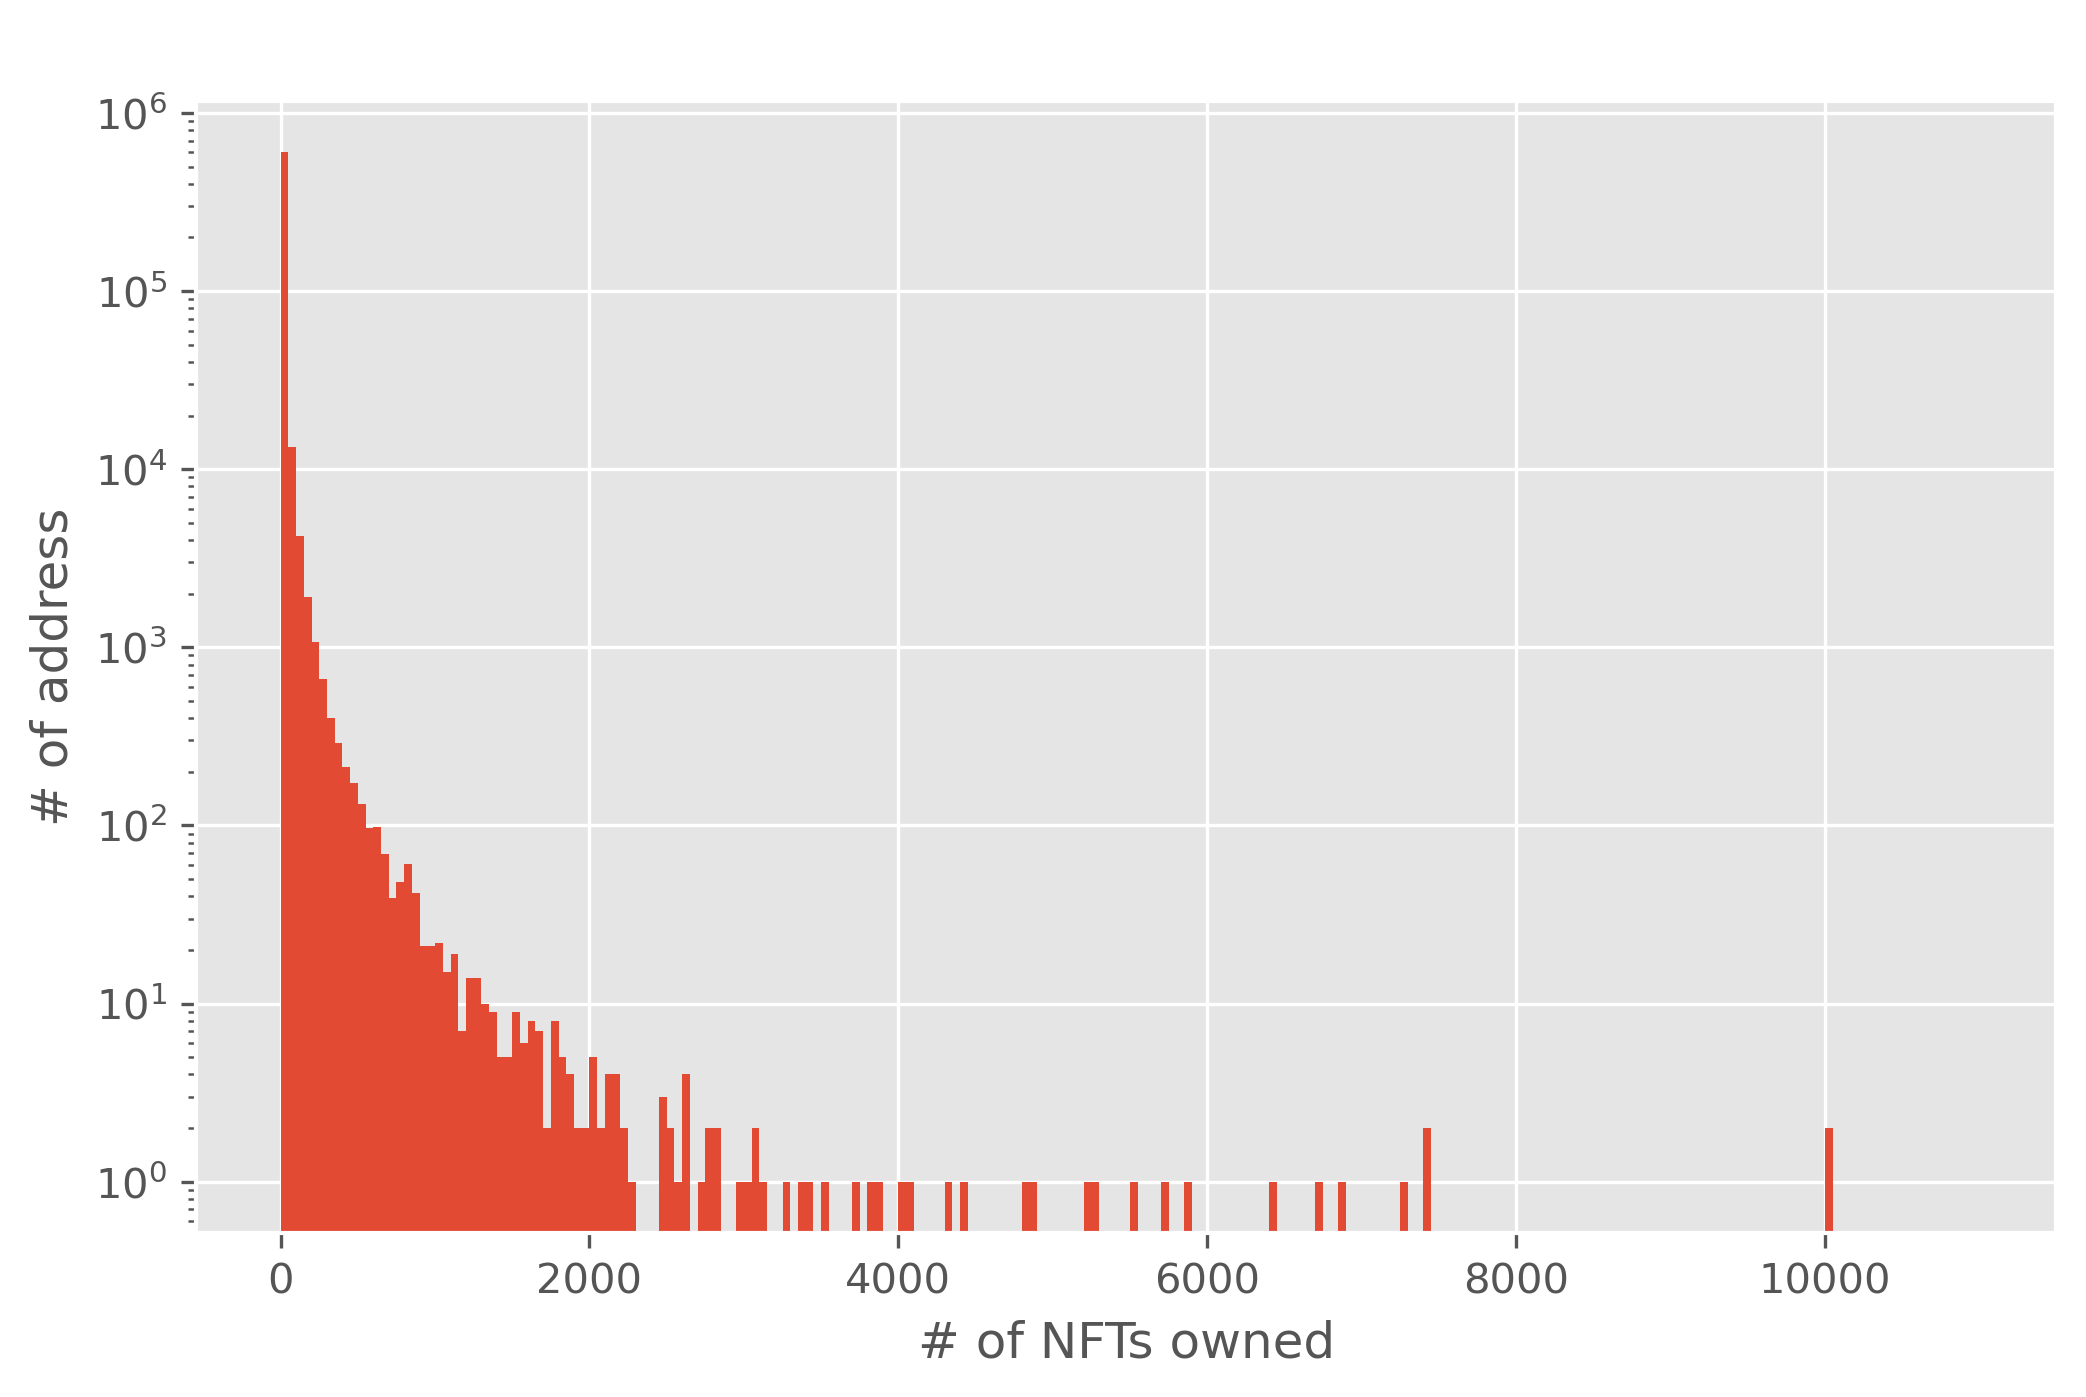

In [11]:
plt.figure(figsize=(8,5), dpi=300);
plt.xlabel("# of NFTs owned")
plt.ylabel("# of address")
plt.title('Owner vs NFT count (log scale)')
# _, _, _ = plt.hist(big_fishes_df["num_tokens"], bins=100, log=True);
plt.hist(big_fishes_df["num_tokens"], bins=np.arange(0,11000,50), log=True);

In [12]:
# plt.figure(figsize=(8,5), dpi=300);
# plt.xlabel("rank of token owner")
# plt.ylabel("number of tokens owned")
# plt.plot([np.log(i+1) for i in range(len(big_fishes_df["num_tokens"]))], np.log(big_fishes_df["num_tokens"]));

## Cutoff

In [13]:
threshold = 1000

In [14]:
smaller_fishes = [nft_token for nft_token in big_fishes_df['num_tokens'] if nft_token <= threshold]
smaller_fishes[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

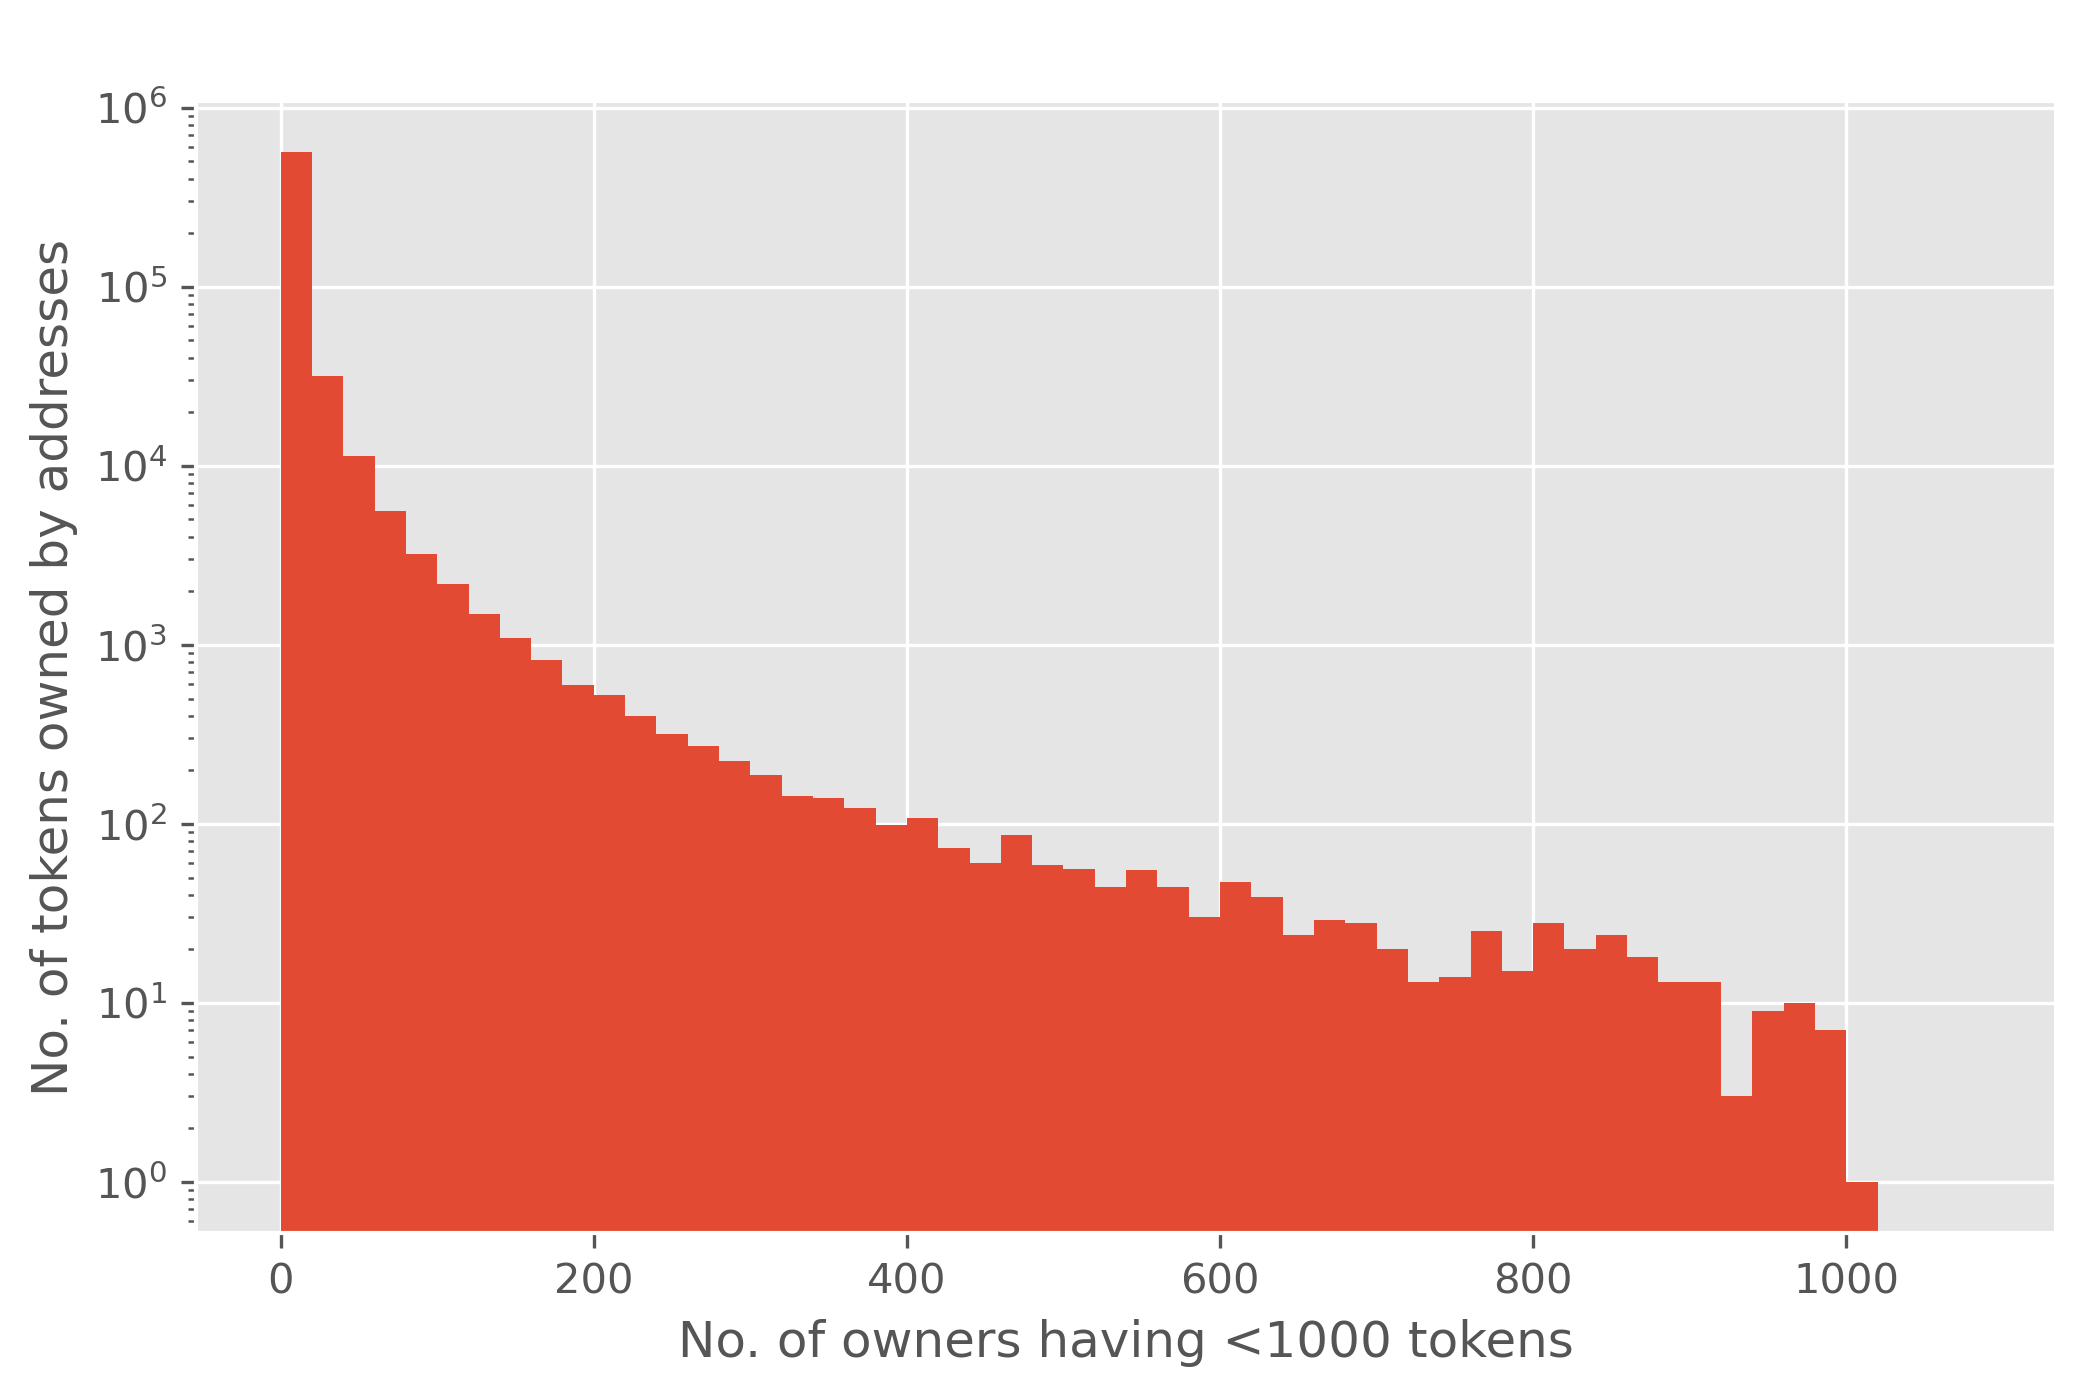

In [15]:
sns.set_style();  
plt.figure(figsize=(8,5), dpi=300);
plt.xlabel(f'No. of owners having <{threshold} tokens');
plt.ylabel('No. of tokens owned by addresses');
plt.title(f'Histogram of owners with <{threshold} tokens');
plt.hist(smaller_fishes, bins = np.arange(0,1100,20), log = True);

In [16]:
contract_owners_df = current_owners_df.groupby(["nft_address", "owner"],
                                               as_index=False).size().rename(columns={"size": "num_tokens"})

In [17]:
contract_owners_df.head()

,nft_address,owner,num_tokens
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x429a635eD4DaF9529C07d5406D466B349EC34361,3
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x5e5C817E9264B46cBBB980198684Ad9d14f3e0B4,5
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x8376f63c13b99D3eedfA51ddd77Ff375279B3Ba0,1
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x83D7Da9E572C5ad14caAe36771022C43AF084dbF,5
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x8A73024B39A4477a5Dc43fD6360e446851AD1D28,5


In [18]:
contract_owners_groups = contract_owners_df.groupby(["nft_address"])

entropies = {}

for contract_address, owners_group in contract_owners_groups:
    total_supply = owners_group["num_tokens"].sum()
    owners_group["p"] = owners_group["num_tokens"]/total_supply
    owners_group["log(p)"] = np.log2(owners_group["p"])
    owners_group["-plog(p)"] = (-1) * owners_group["p"] * owners_group["log(p)"]
    entropy = owners_group["-plog(p)"].sum()
    entropies[contract_address] = entropy
    


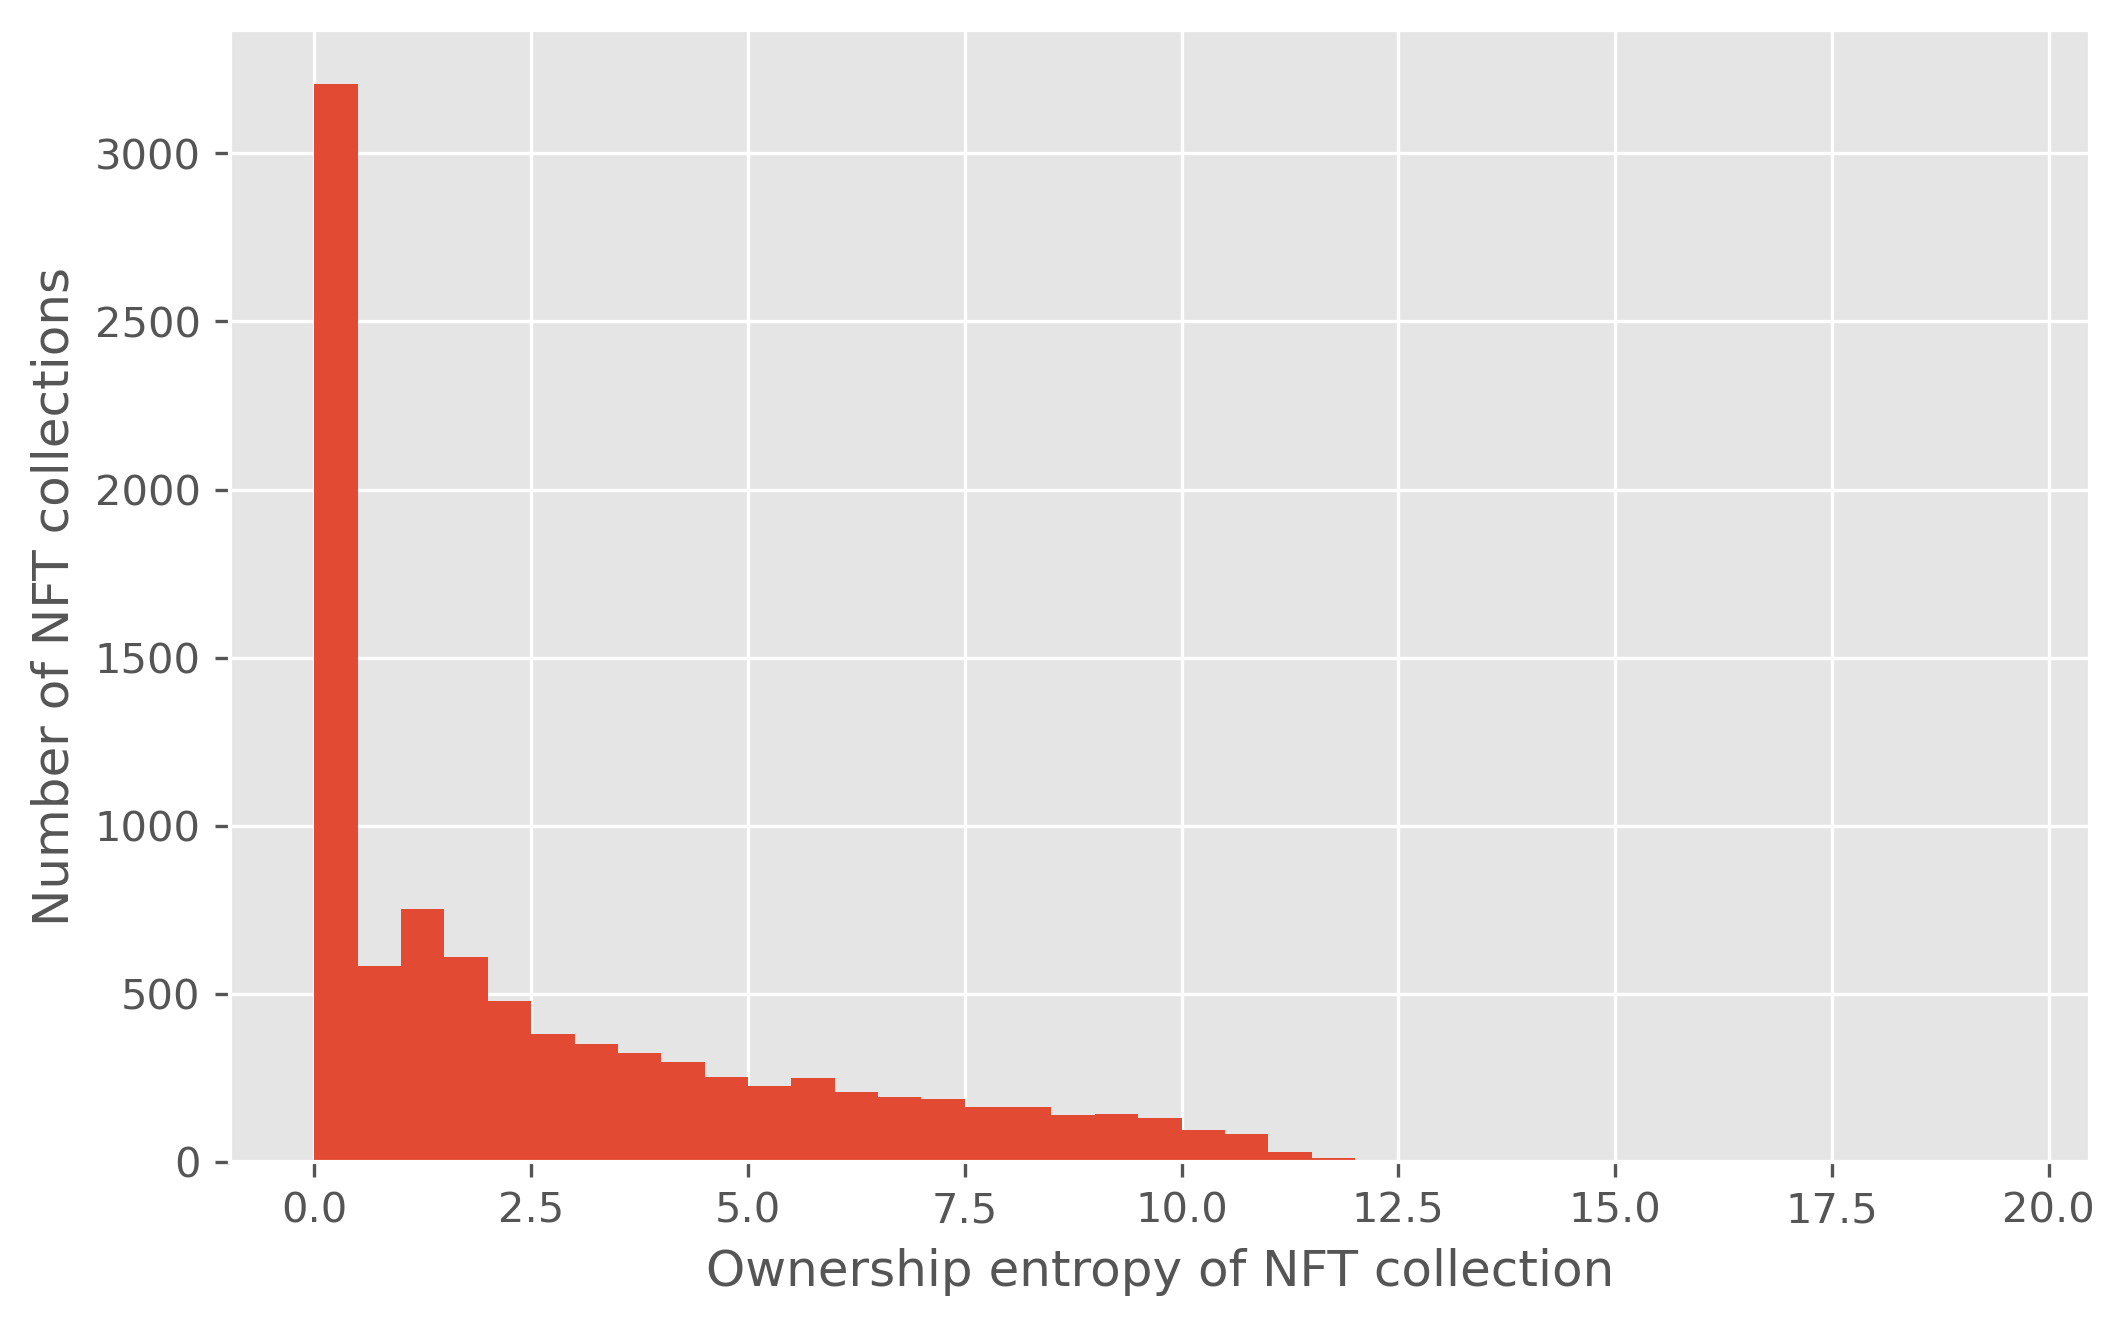

In [19]:
plt.figure(figsize=(8,5), dpi=300);
plt.xlabel(f"Ownership entropy of NFT collection");
plt.ylabel("Number of NFT collections");
plt.hist(entropies.values(), bins=np.arange(0,20,0.5));

## Serious NFT projects 

## minting Strategies

In [20]:
mints_df = pd.read_csv('mints.csv')
mints_df.head()

,event_id,transaction_hash,block_number,nft_address,token_id,from_address,to_address,transaction_value,timestamp
0,6c6d226e-2096-4b50-ac3f-f7078ca3a0c2,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3223,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
1,263c923f-4db9-4d81-a547-27e1fe5ec405,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5077,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
2,8baa8502-42f9-453e-824a-ad504045c9c5,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5070,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
3,364ee658-ff31-4d0a-a7a7-60d3d7822772,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3757,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
4,58d3adc3-03d2-4e7b-b02c-47957c1f5752,0xd44be17c0298717ce001843069b0a2ca08b577fa2b33...,12936414,0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85,3252202771441387673917605047769619801375983664...,0x0000000000000000000000000000000000000000,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,2.251726e+15,1627776925


## mints per contract

In [21]:
mints_stats_df = mints_df.groupby('nft_address',
                                  as_index=False).size().rename(columns={'size':'num_nfts'})

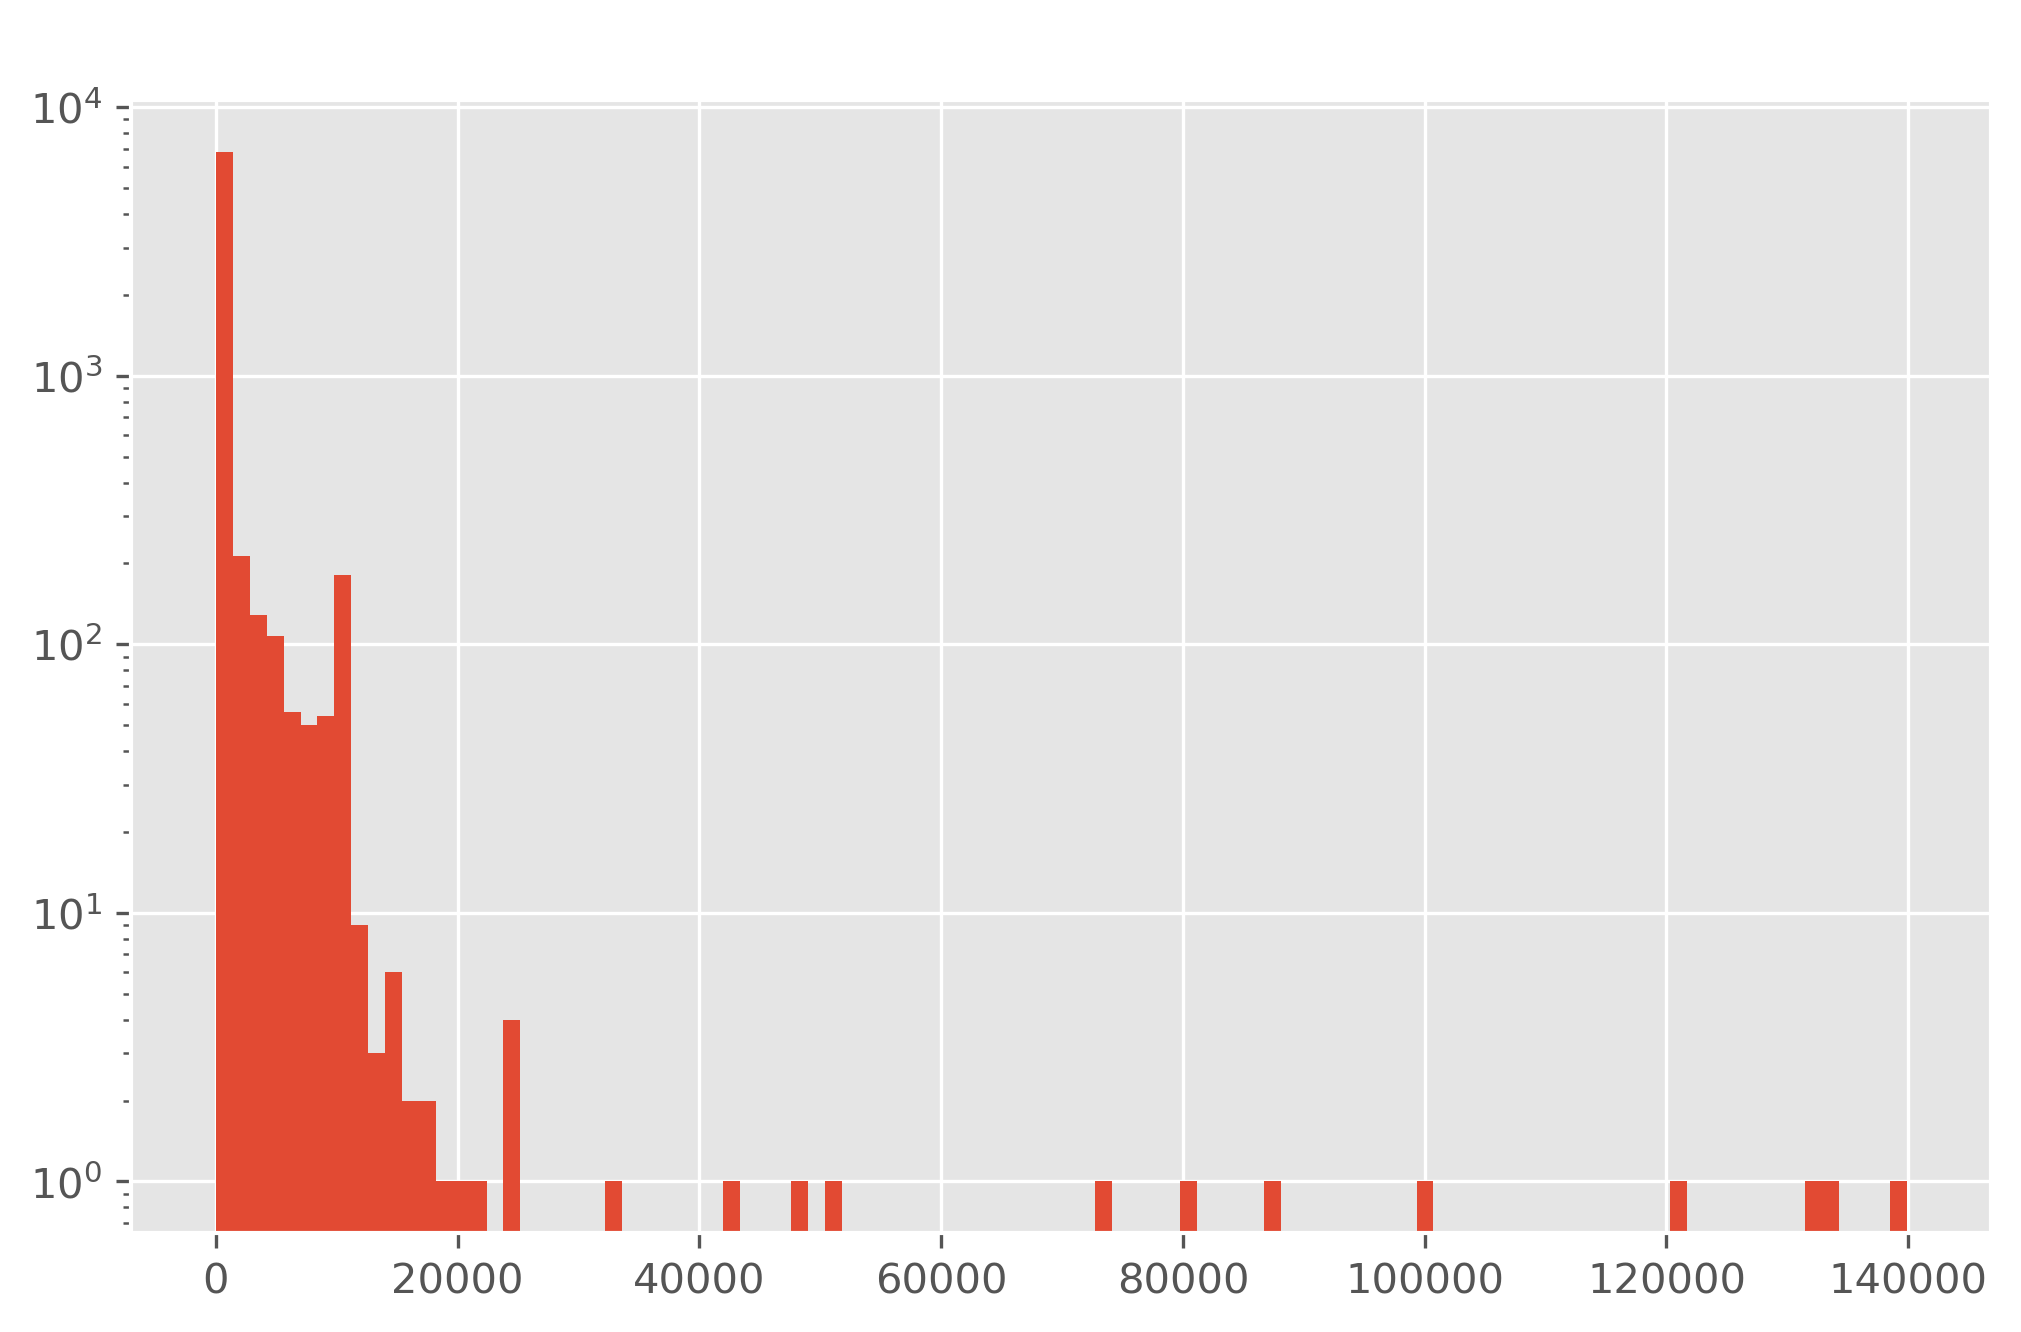

In [22]:
plt.figure(figsize=(8,5), dpi=300);
plt.title('Number of nfts')
plt.hist(mints_stats_df['num_nfts'], bins = 100, log = True);

In [23]:
q_val = np.arange(0.1,1.1,0.1)
q_val

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [24]:
mints_stats_df.quantile(q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

,num_nfts
0.1,1.0
0.2,2.0
0.3,3.0
0.4,7.0
0.5,15.0
0.6,36.0
0.7,100.0
0.8,315.8
0.9,1718.6
1.0,139894.0


In [25]:
analysis_sample_df = mints_stats_df[mints_stats_df['num_nfts'] >= 100]
analysis_sample_df.head()

,nft_address,num_nfts
1,0x000000000437b3CCE2530936156388Bff5578FC3,129
6,0x00000633Df1228868270bAdB2B812E12e13fdB91,1088
8,0x000E49C87d2874431567d38FF9548890aB39BAac,6650
9,0x001B4b85192aa034bff1524f181e3a7060e0dC30,112
17,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,10000


In [26]:
analysis_sample_df.count()

nft_address    2357
num_nfts       2357
dtype: int64

## How many NFTs minted to a single address? 

In [27]:
analysis_mints_df = mints_df[mints_df['nft_address'].isin(analysis_sample_df['nft_address'])]

In [28]:
mint_reciever_df = analysis_mints_df.groupby('nft_address', 
                                             as_index=False)['to_address'].nunique().rename(columns = 
                                                            {'to_address':'num_receivers'})

In [29]:
mint_reciever_df.head()

,nft_address,num_receivers
0,0x000000000437b3CCE2530936156388Bff5578FC3,26
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,155
2,0x000E49C87d2874431567d38FF9548890aB39BAac,1615
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,1
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,1292


In [30]:
receiver_analysis_df = mint_reciever_df.merge(mints_stats_df,
                                             on = 'nft_address')

In [31]:
receiver_analysis_df.head()

,nft_address,num_receivers,num_nfts
0,0x000000000437b3CCE2530936156388Bff5578FC3,26,129
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,155,1088
2,0x000E49C87d2874431567d38FF9548890aB39BAac,1615,6650
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,1,112
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,1292,10000


In [32]:
receiver_analysis_df.count()

nft_address      2357
num_receivers    2357
num_nfts         2357
dtype: int64

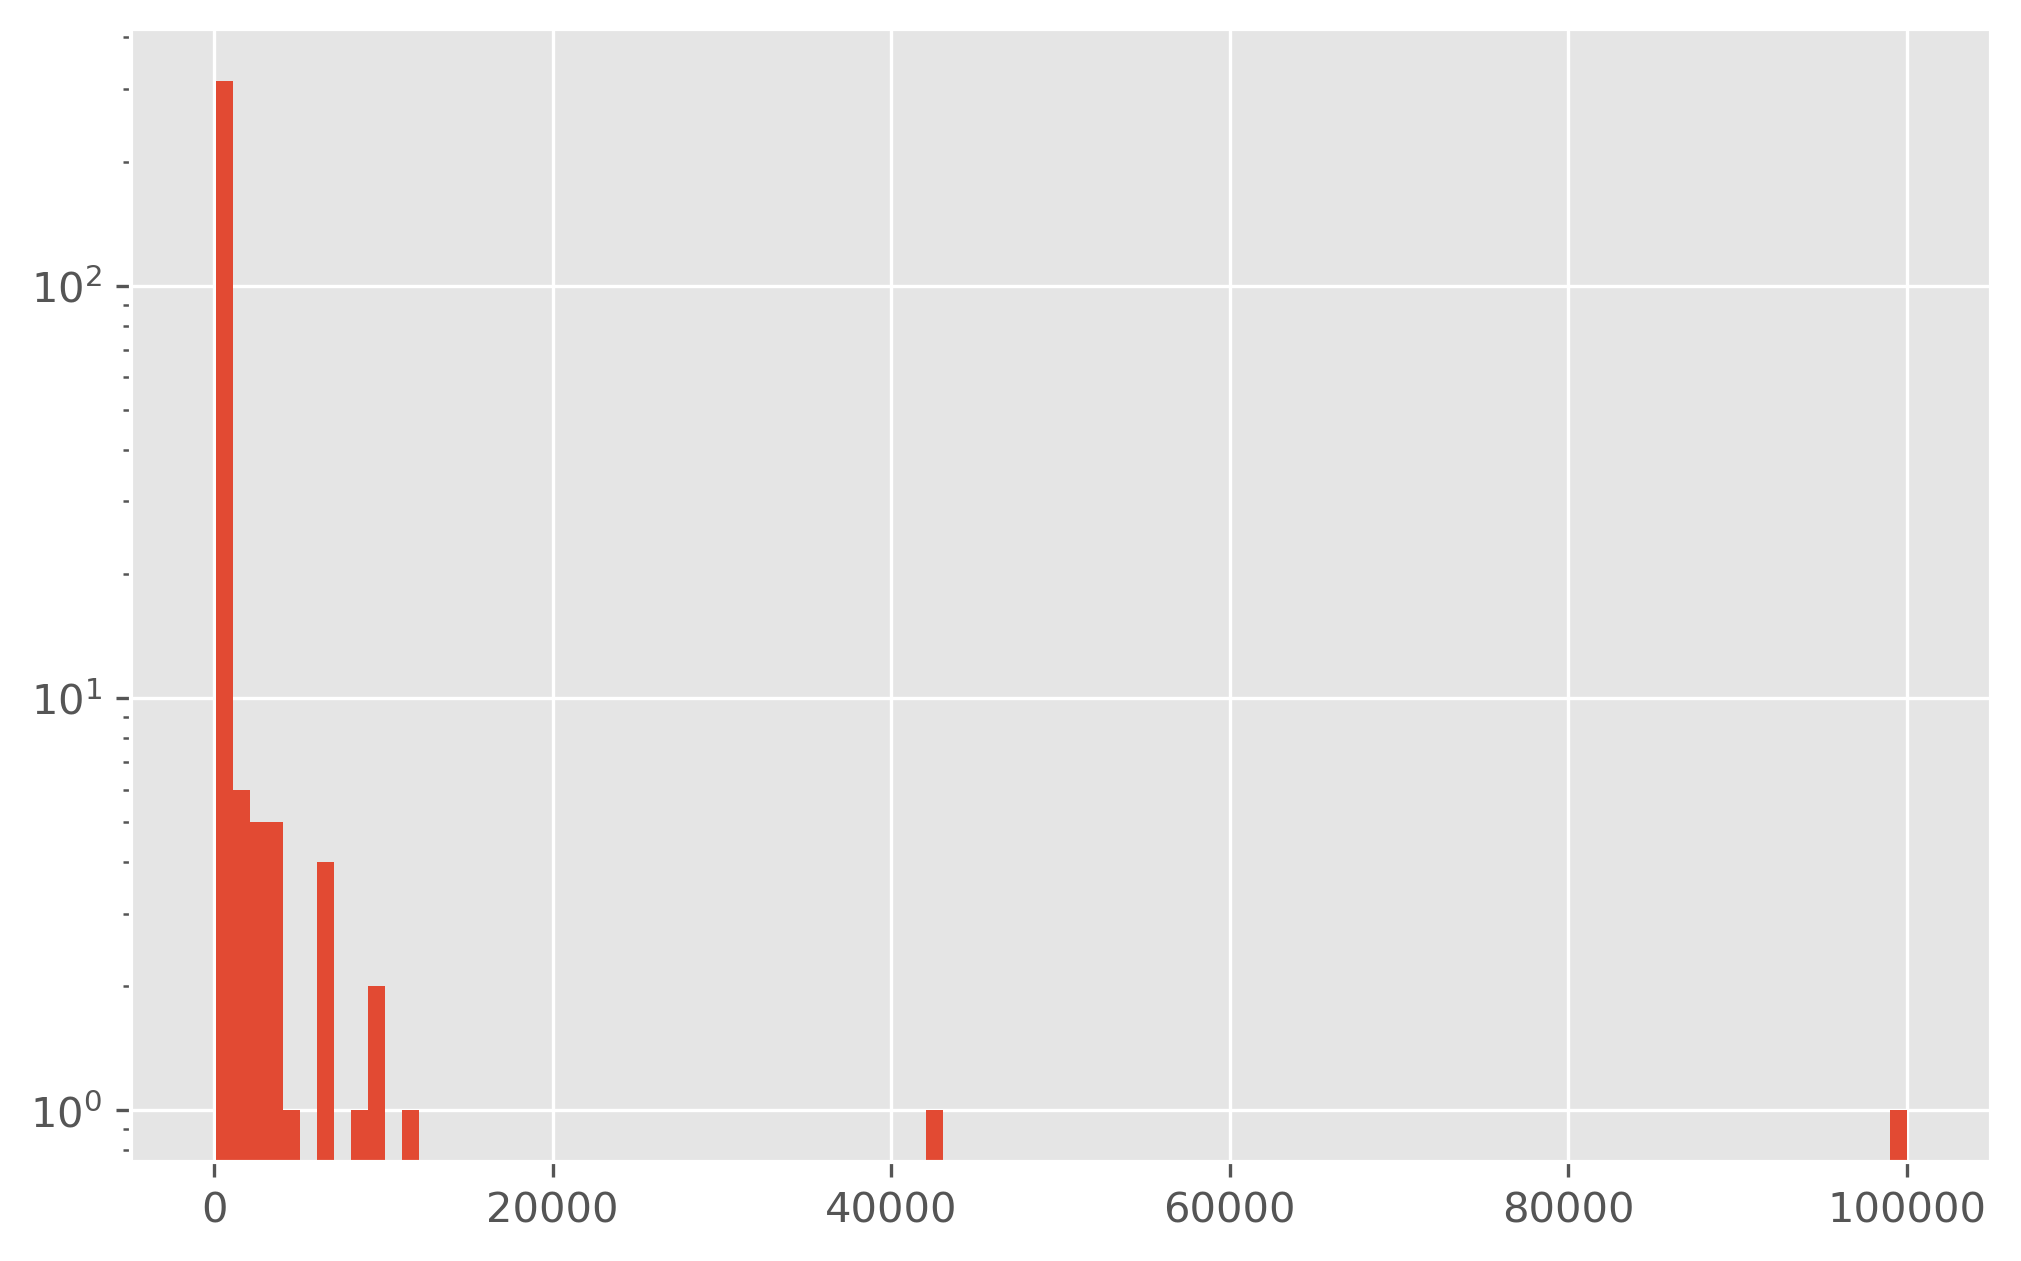

In [33]:
plt.figure(figsize=(8,5), dpi=300);
plt.hist('num_nfts', data=receiver_analysis_df[mint_reciever_df['num_receivers'] == 1], bins = 100, log=True);

In [34]:
receiver_analysis_df['weighted_num_receivers'] =\
                    receiver_analysis_df['num_receivers']/receiver_analysis_df['num_nfts']

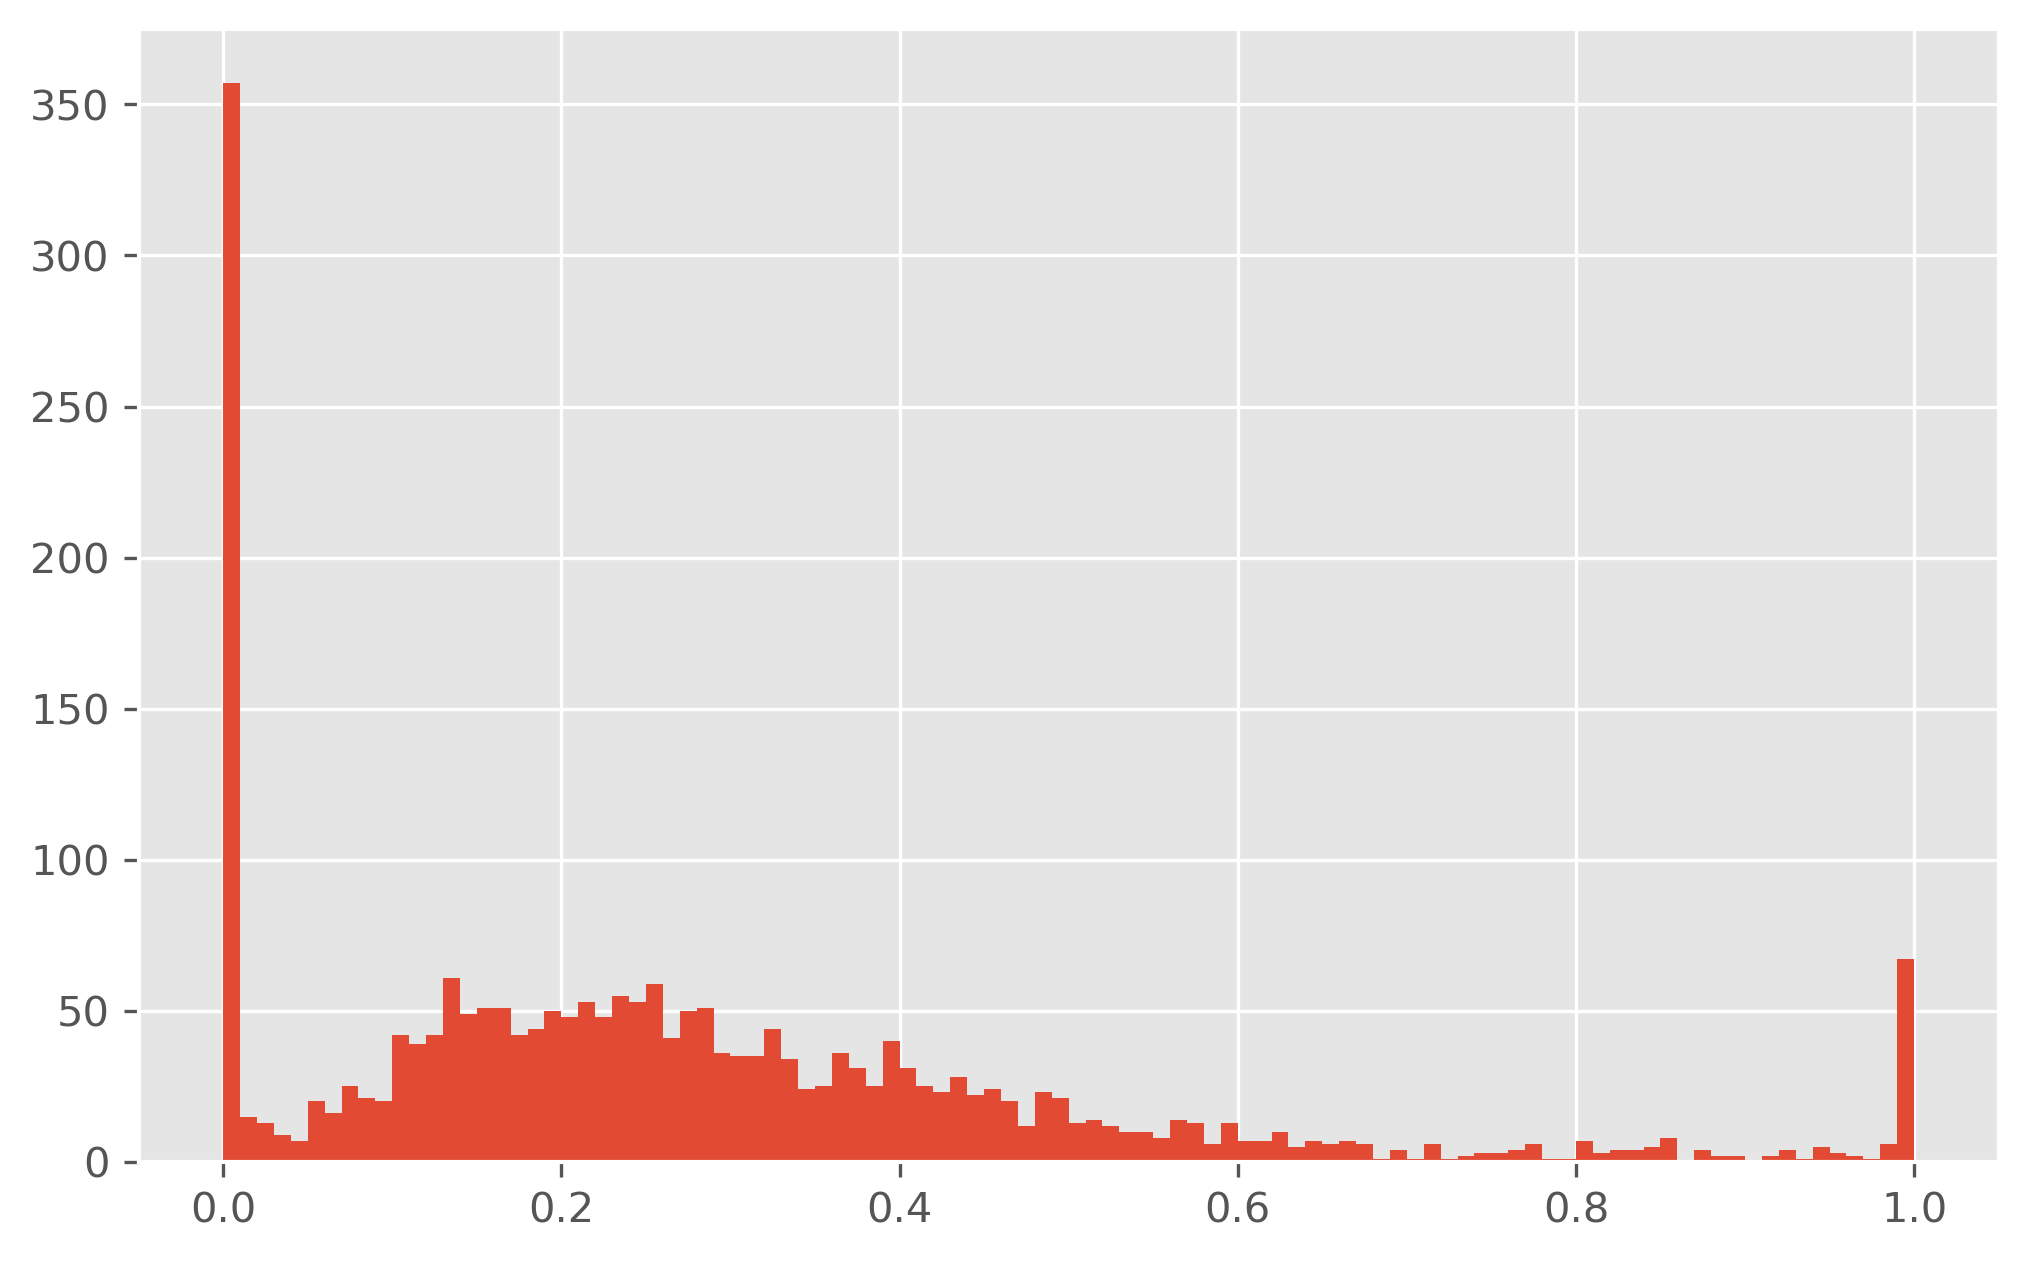

In [35]:
plt.figure(figsize=(8,5), dpi=300);
plt.hist(receiver_analysis_df['weighted_num_receivers'], bins = 100);

## How long does minitnig period last on on each NFT?

In [36]:
minting_period_df = analysis_mints_df.groupby(
    "nft_address", as_index=False).agg(min_timestamp=pd.NamedAgg(column="timestamp", aggfunc="min"),
                                       max_timestamp=pd.NamedAgg(column="timestamp", aggfunc="max"))



In [37]:
minting_period_df.head()

,nft_address,min_timestamp,max_timestamp
0,0x000000000437b3CCE2530936156388Bff5578FC3,1626506862,1632425761
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,1630760998,1631346316
2,0x000E49C87d2874431567d38FF9548890aB39BAac,1631895759,1632586360
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,1620428643,1620429463
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,1627076574,1627079304


In [38]:
minting_period_df['duration'] = minting_period_df['max_timestamp'] - minting_period_df['min_timestamp']

In [39]:
minting_period_df.head()

,nft_address,min_timestamp,max_timestamp,duration
0,0x000000000437b3CCE2530936156388Bff5578FC3,1626506862,1632425761,5918899
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,1630760998,1631346316,585318
2,0x000E49C87d2874431567d38FF9548890aB39BAac,1631895759,1632586360,690601
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,1620428643,1620429463,820
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,1627076574,1627079304,2730


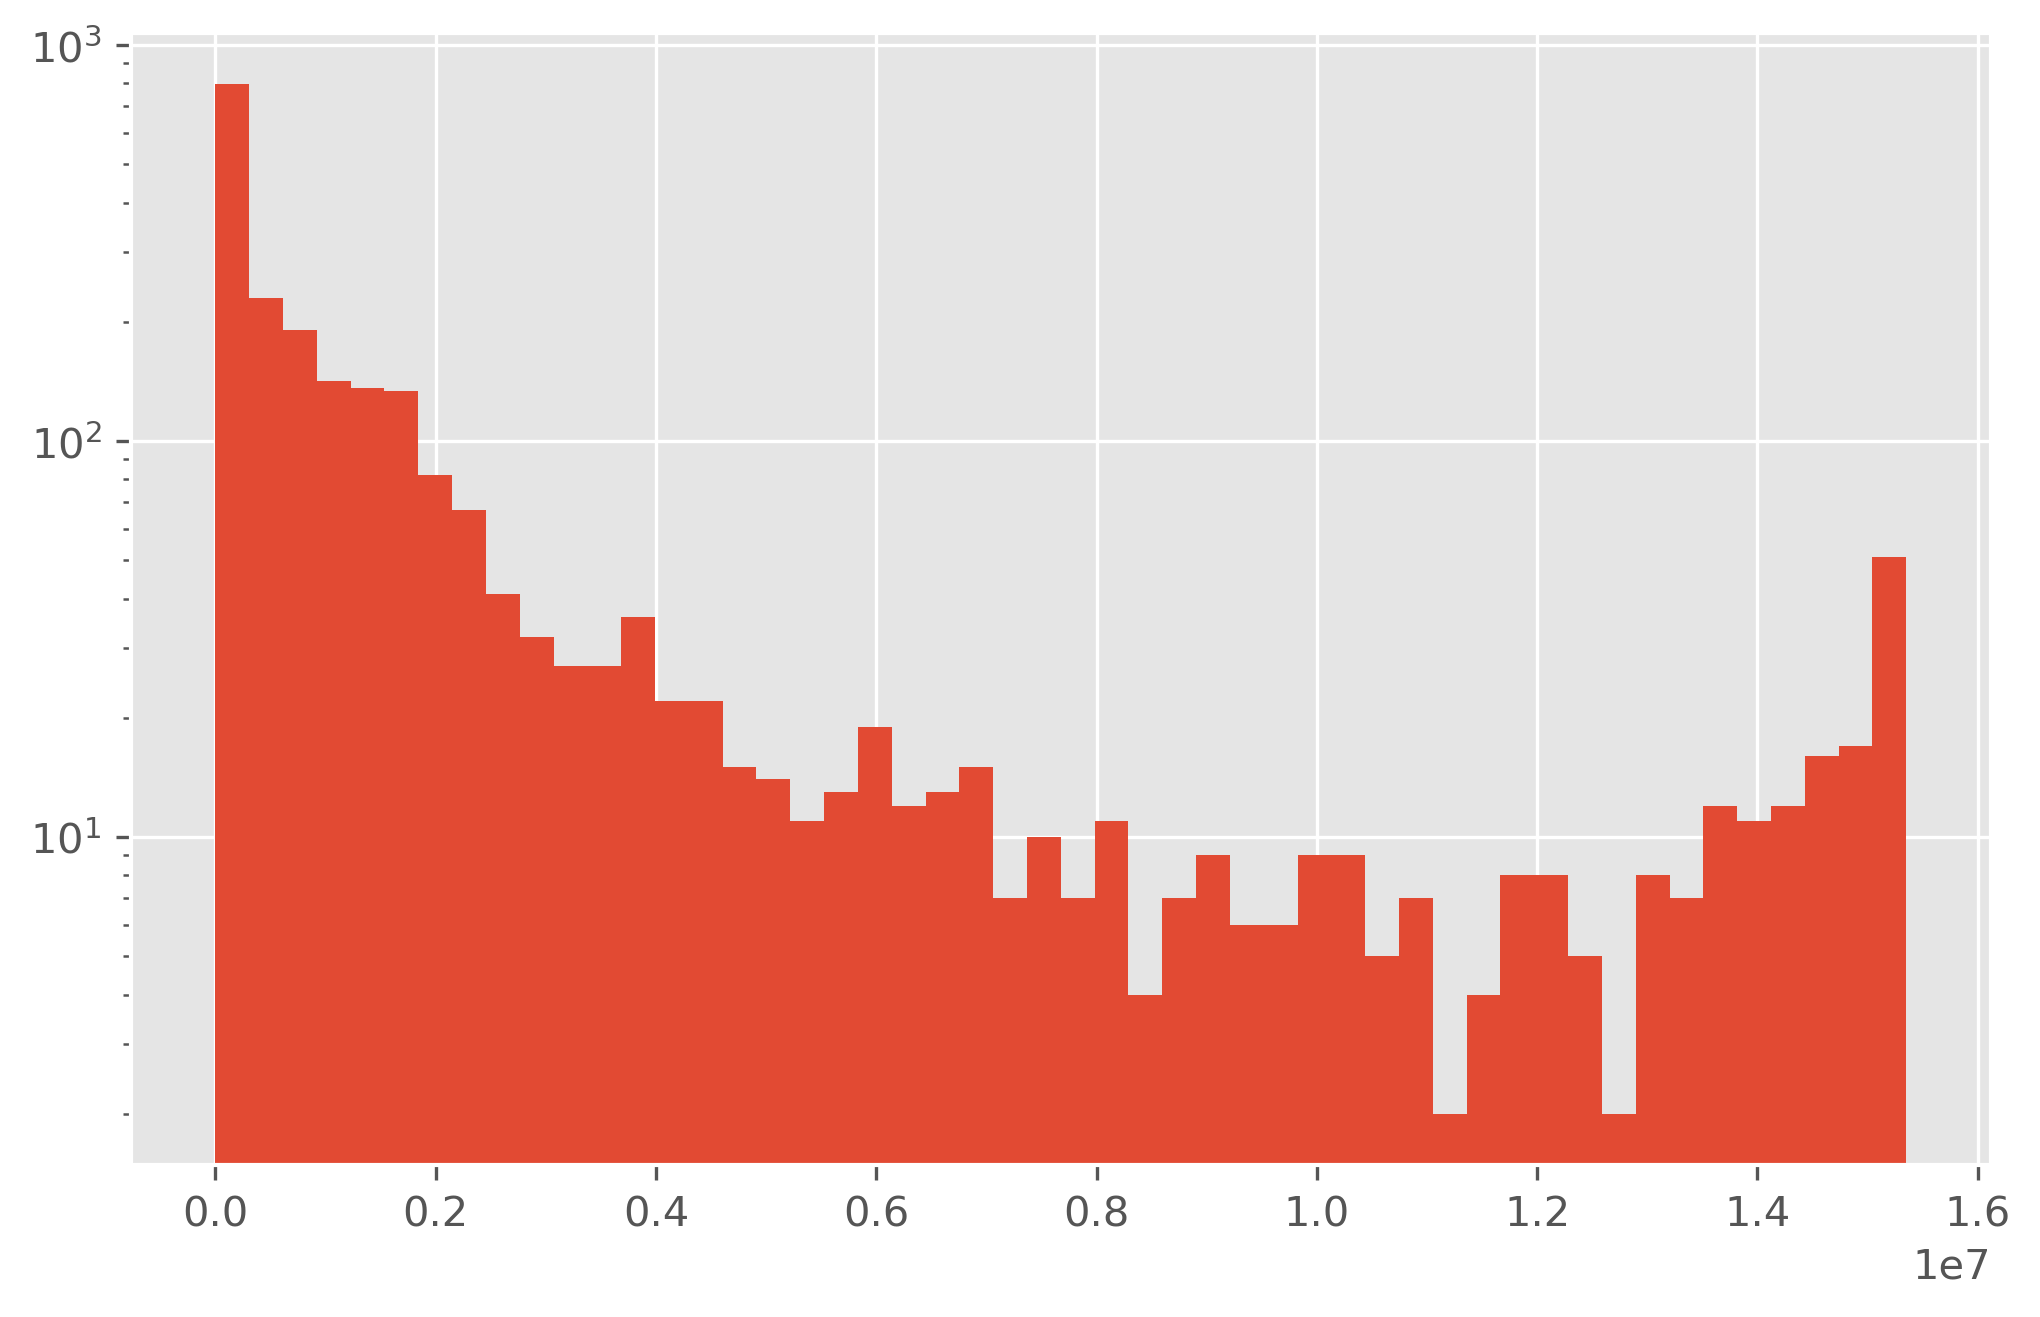

In [40]:
plt.figure(figsize=(8,5), dpi=300);
plt.hist(minting_period_df['duration'], bins = 50, log = True);

In [41]:
minting_period_analysis_df = minting_period_df.merge(receiver_analysis_df, on='nft_address')
minting_period_analysis_df.head()

,nft_address,min_timestamp,max_timestamp,duration,num_receivers,num_nfts,weighted_num_receivers
0,0x000000000437b3CCE2530936156388Bff5578FC3,1626506862,1632425761,5918899,26,129,0.201550
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,1630760998,1631346316,585318,155,1088,0.142463
2,0x000E49C87d2874431567d38FF9548890aB39BAac,1631895759,1632586360,690601,1615,6650,0.242857
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,1620428643,1620429463,820,1,112,0.008929
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,1627076574,1627079304,2730,1292,10000,0.129200


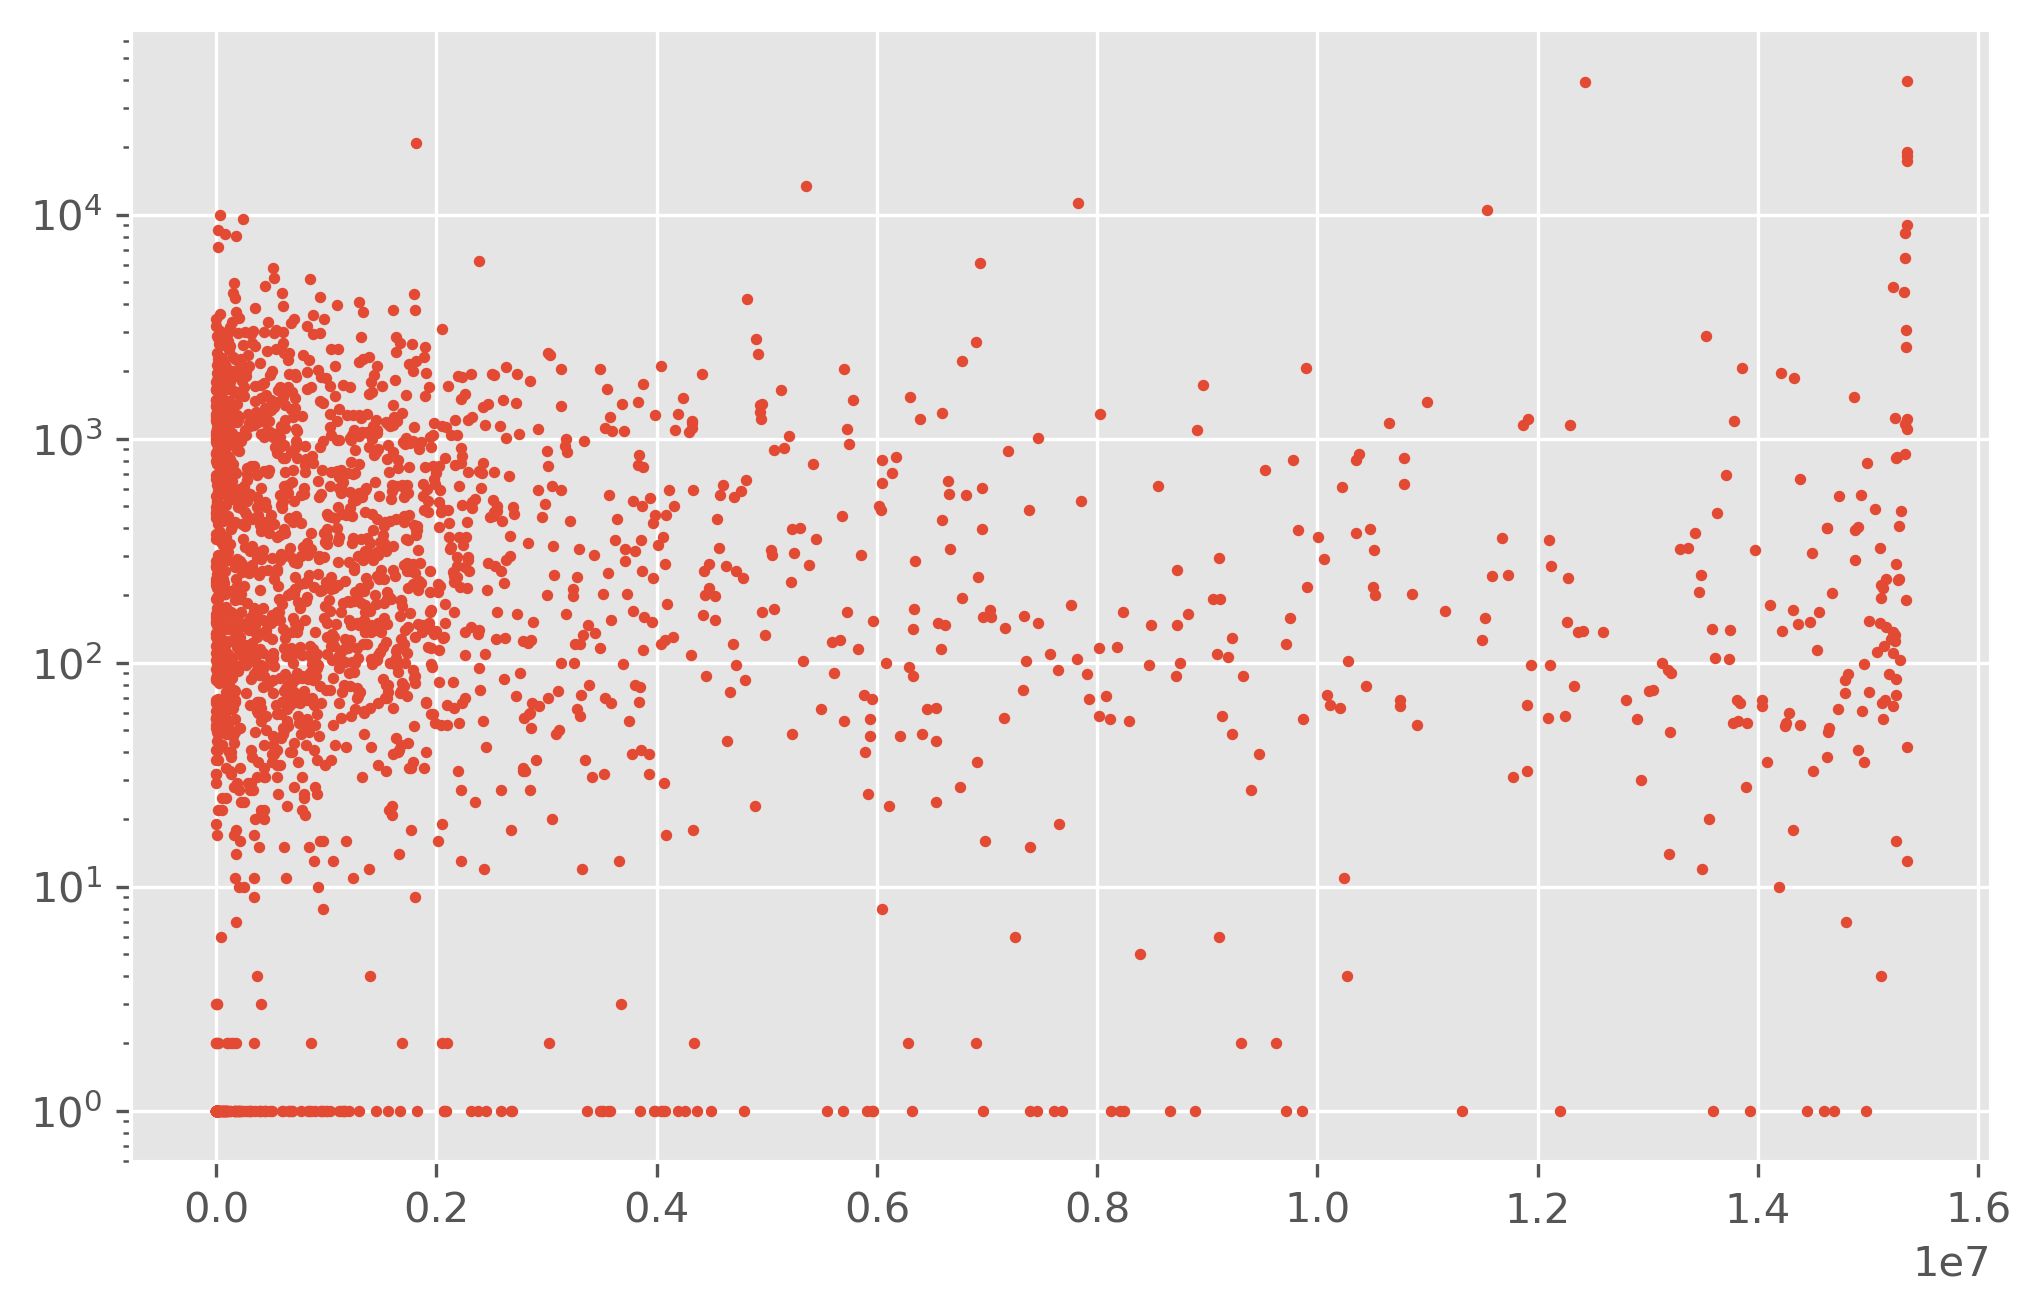

In [42]:
plt.figure(figsize=(8,5), dpi=300);
plt.yscale('log')
plt.scatter('duration', 'num_receivers', data=minting_period_analysis_df, s = 5);

## Do NFTs charge for minting ? 

In [43]:
minting_costs_df = analysis_mints_df.groupby("nft_address",
            as_index=False).agg(mean_cost=pd.NamedAgg(column="transaction_value", aggfunc="mean"),
            min_cost=pd.NamedAgg(column="transaction_value", aggfunc="min"),
             max_cost=pd.NamedAgg(column="transaction_value", aggfunc="max"))

In [44]:
minting_costs_df["mean_cost_ether"] = minting_costs_df["mean_cost"]/(10**18)
minting_costs_df["min_cost_ether"] = minting_costs_df["min_cost"]/(10**18)
minting_costs_df["max_cost_ether"] = minting_costs_df["max_cost"]/(10**18)

In [45]:
minting_costs_df.head()

,nft_address,mean_cost,min_cost,max_cost,mean_cost_ether,min_cost_ether,max_cost_ether
0,0x000000000437b3CCE2530936156388Bff5578FC3,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,1.028493e+16,0.0,3.000000e+17,0.010285,0.0,0.30
2,0x000E49C87d2874431567d38FF9548890aB39BAac,3.224662e+17,0.0,1.600000e+18,0.322466,0.0,1.60
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,7.342430e+17,0.0,1.050000e+18,0.734243,0.0,1.05


In [46]:
cost_analysis_df = minting_costs_df.merge(minting_period_analysis_df, on = 'nft_address')
cost_analysis_df.head()

,nft_address,mean_cost,min_cost,max_cost,mean_cost_ether,min_cost_ether,max_cost_ether,min_timestamp,max_timestamp,duration,num_receivers,num_nfts,weighted_num_receivers
0,0x000000000437b3CCE2530936156388Bff5578FC3,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00,1626506862,1632425761,5918899,26,129,0.201550
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,1.028493e+16,0.0,3.000000e+17,0.010285,0.0,0.30,1630760998,1631346316,585318,155,1088,0.142463
2,0x000E49C87d2874431567d38FF9548890aB39BAac,3.224662e+17,0.0,1.600000e+18,0.322466,0.0,1.60,1631895759,1632586360,690601,1615,6650,0.242857
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00,1620428643,1620429463,820,1,112,0.008929
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,7.342430e+17,0.0,1.050000e+18,0.734243,0.0,1.05,1627076574,1627079304,2730,1292,10000,0.129200


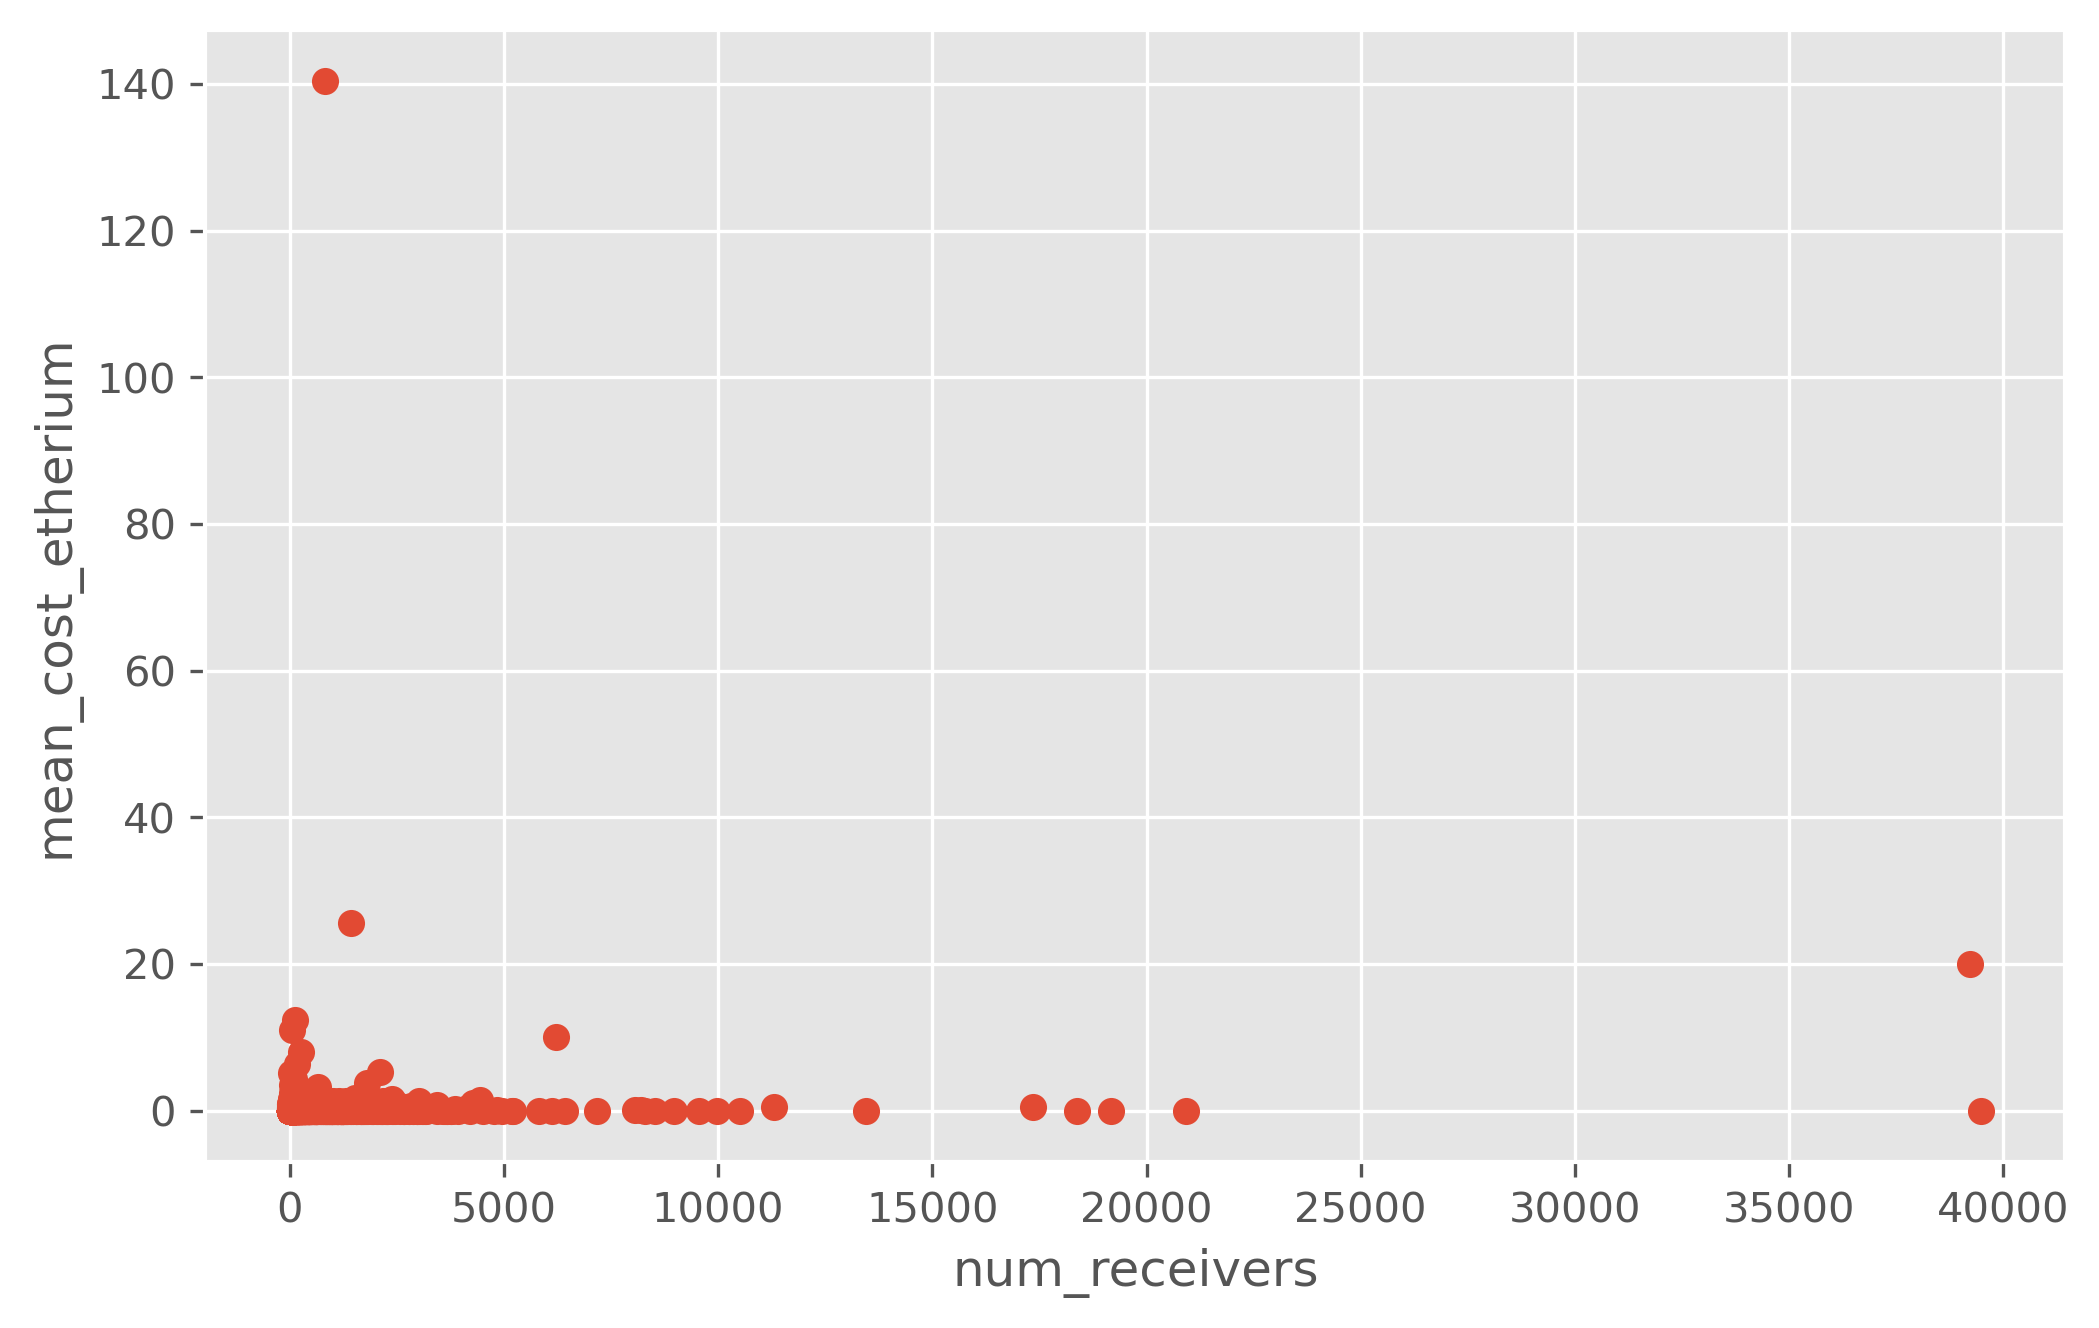

In [47]:
plt.figure(figsize=(8,5), dpi=300);
plt.ylabel('mean_cost_etherium')
plt.xlabel('num_receivers')
plt.scatter('num_receivers', 'mean_cost_ether', data=cost_analysis_df);

In [48]:
cost_analysis_df[cost_analysis_df['mean_cost_ether'] > 10]

,nft_address,mean_cost,min_cost,max_cost,mean_cost_ether,min_cost_ether,max_cost_ether,min_timestamp,max_timestamp,duration,num_receivers,num_nfts,weighted_num_receivers
53,0x0580Ae26963230BFBd2A775ff0AFA937Fd157774,1.100312e+19,1.000000e+18,2.000000e+19,11.003120,1.0,20.000000,1617266193,1627138862,9872669,56,641,0.087363
530,0x39C1Fb9a9b3b39f1953E7967156A8f11A831Fd44,2.554746e+19,0.000000e+00,7.500000e+19,25.547455,0.0,75.000000,1628892033,1632581988,3689955,1433,9922,0.144427
538,0x3AFF7B16489Fcc59483DE44e96Bd9Ec533915924,1.236569e+19,0.000000e+00,3.200000e+20,12.365689,0.0,320.000000,1624360880,1632379184,8018304,117,241,0.485477
805,0x58A3c68e2D3aAf316239c003779F71aCb870Ee47,1.403965e+20,0.000000e+00,1.500065e+22,140.396493,0.0,15000.647964,1617247192,1632512942,15265750,831,1714,0.484831
879,0x60E4d786628Fea6478F785A6d7e704777c86a7c6,1.006613e+19,0.000000e+00,5.933704e+19,10.066128,0.0,59.337037,1630197658,1632581237,2383579,6220,15732,0.395372
1619,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.994785e+19,0.000000e+00,1.890000e+22,19.947850,0.0,18900.000000,1620157956,1632586360,12428404,39220,132087,0.296926


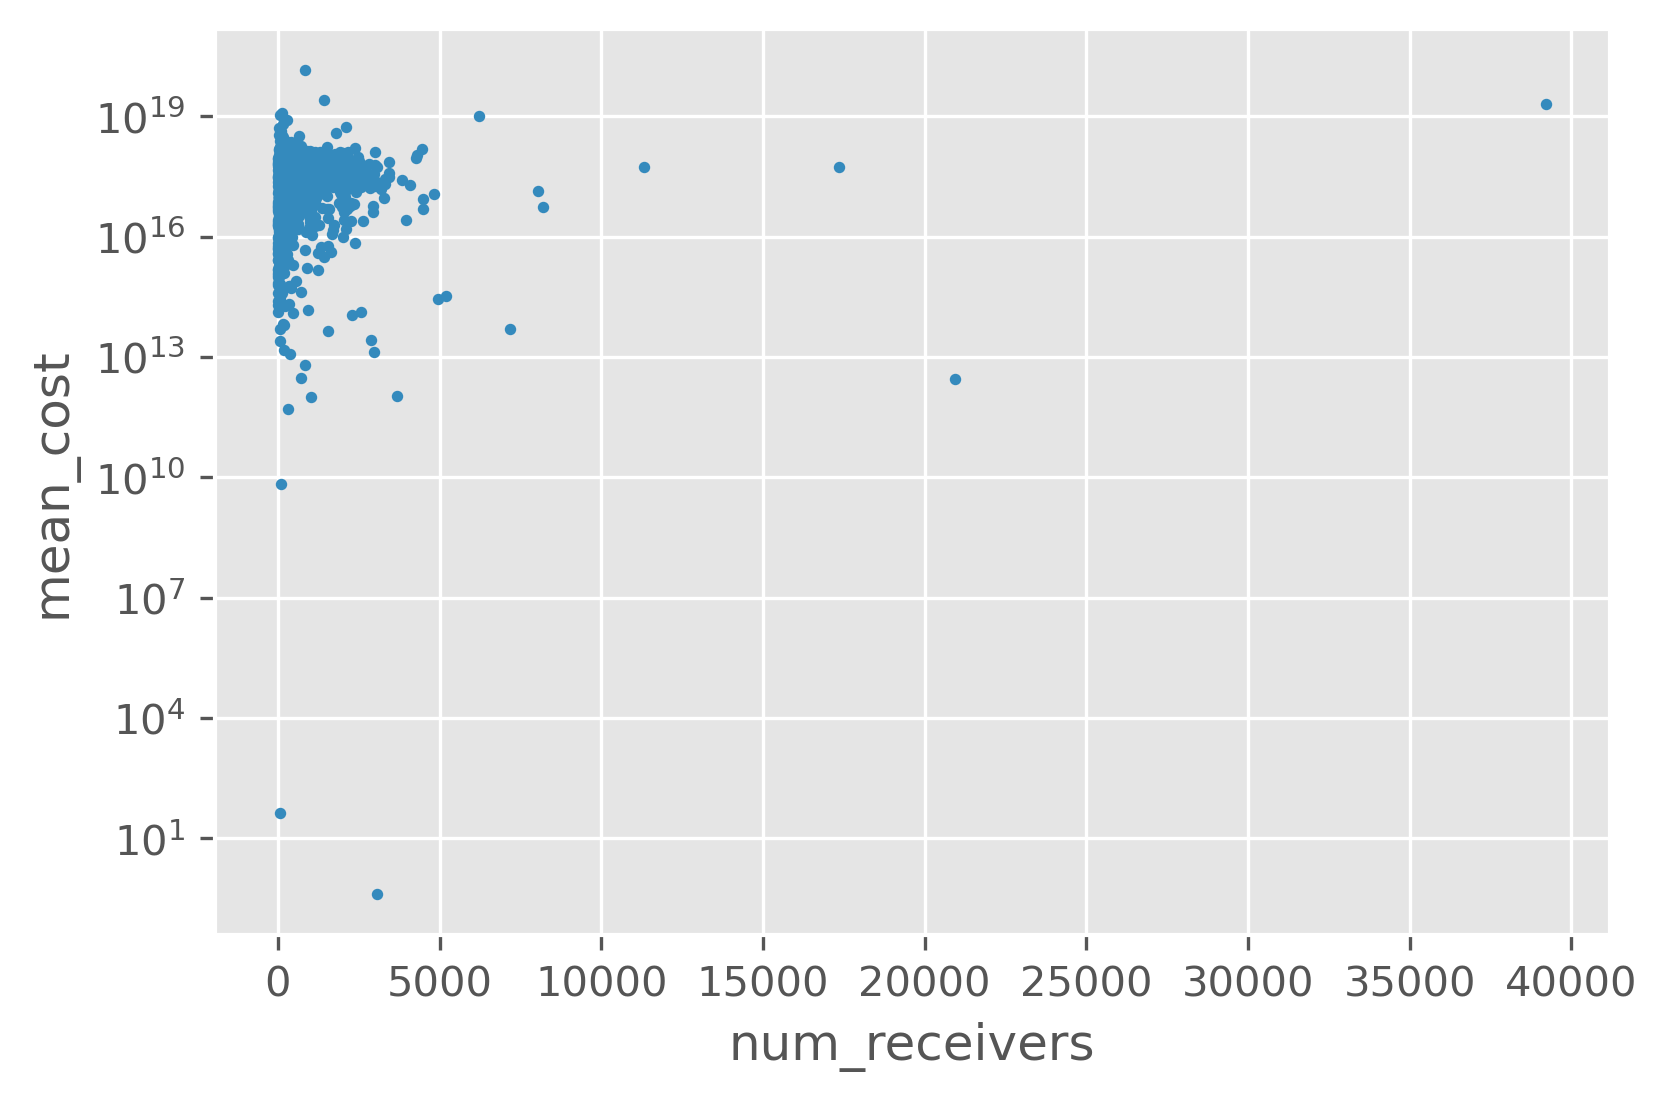

In [49]:
plt.rcParams["figure.dpi"] = 300;
cost_analysis_df[cost_analysis_df["max_cost"] != 0].plot.scatter("num_receivers", "mean_cost", logy=True, s = 5);

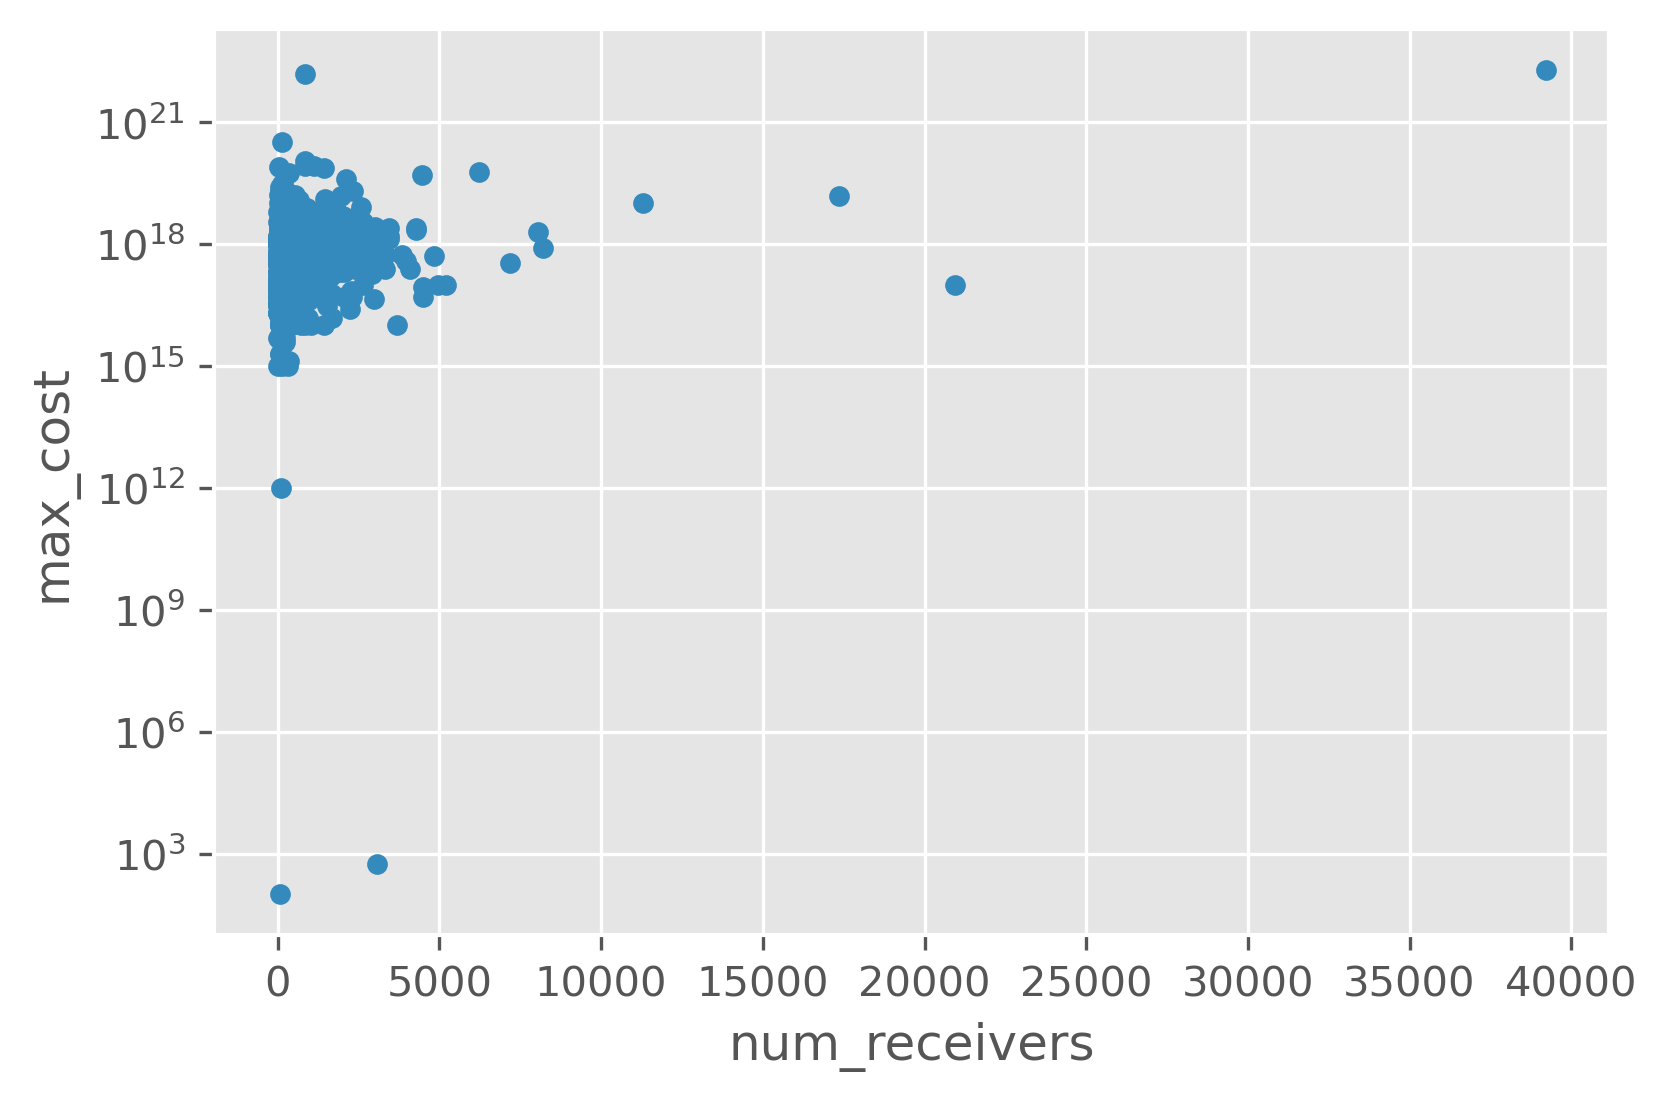

In [50]:
plt.rcParams["figure.dpi"] = 300;
cost_analysis_df[cost_analysis_df['max_cost'] != 0].plot.scatter('num_receivers', 'max_cost',logy = True);